**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

**Read EEG.csv file**

In [2]:
df = pd.read_csv('ECG.csv')
df.head()

,Unnamed: 0,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169
0,0,O,5,661.190476,658.333333,55.278736,106.962730,111.113889,13,0.928571,...,0.165551,0.196,0.321645,0.074160,0.000000,0.000000,0.000000,0.019540,0.340,0.000
1,1,O,5,661.666667,658.333333,56.579873,108.407273,112.510209,13,0.928571,...,0.190431,0.196,0.362420,0.085271,0.000000,0.000000,0.000000,0.022238,0.332,0.000
2,2,O,8,661.904762,660.000000,58.758004,112.796617,117.091412,13,0.928571,...,0.094497,0.316,0.376645,0.042448,0.000000,0.000000,0.000000,0.023166,0.452,0.000
3,3,O,7,660.952381,663.333333,59.029597,113.649634,117.981601,13,0.928571,...,0.157149,0.284,0.419043,0.070674,0.026236,0.015264,0.594278,0.025686,0.256,0.128
4,4,O,5,660.476191,663.333333,55.759820,107.623910,111.732026,13,0.928571,...,0.162662,0.204,0.354123,0.072988,0.025833,0.014326,0.657085,0.021802,0.328,0.128


In [3]:
class_counts = df['label'].value_counts()
print(class_counts)

N    5992
O    3151
A     923
~     187
Name: label, dtype: int64


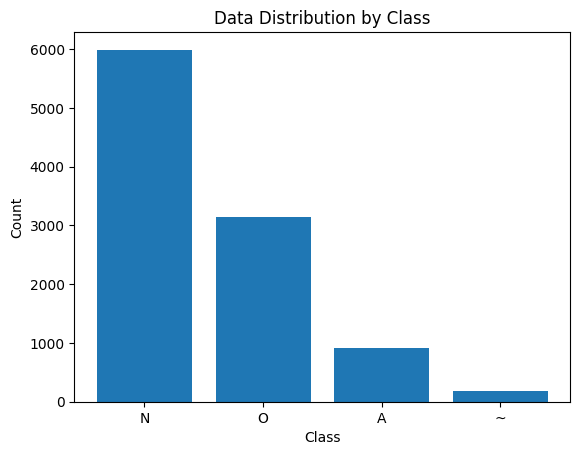

In [4]:
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution by Class')
plt.show()

**Train MLP with 4 hidden layer - no preprocess**

In [5]:
# Map class labels to integers
label_mapping = {'A': 0, 'N': 1, 'O': 2, '~': 3}
df['label'] = df['label'].map(label_mapping)

df = df.iloc[:, 1:]
df.head()


,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169
0,2,5,661.190476,658.333333,55.278736,106.962730,111.113889,13,0.928571,0.041,...,0.165551,0.196,0.321645,0.074160,0.000000,0.000000,0.000000,0.019540,0.340,0.000
1,2,5,661.666667,658.333333,56.579873,108.407273,112.510209,13,0.928571,0.150,...,0.190431,0.196,0.362420,0.085271,0.000000,0.000000,0.000000,0.022238,0.332,0.000
2,2,8,661.904762,660.000000,58.758004,112.796617,117.091412,13,0.928571,0.041,...,0.094497,0.316,0.376645,0.042448,0.000000,0.000000,0.000000,0.023166,0.452,0.000
3,2,7,660.952381,663.333333,59.029597,113.649634,117.981601,13,0.928571,0.041,...,0.157149,0.284,0.419043,0.070674,0.026236,0.015264,0.594278,0.025686,0.256,0.128
4,2,5,660.476191,663.333333,55.759820,107.623910,111.732026,13,0.928571,0.041,...,0.162662,0.204,0.354123,0.072988,0.025833,0.014326,0.657085,0.021802,0.328,0.128


In [6]:
# Split the data into features (X) and labels (y)
X = df.iloc[:, 1:]  # Extract all columns except the 'label'
y = df['label']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
# Convert data to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [8]:
# Create a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(169,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [9]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
History = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
289/289 [==============================] - 2s 2ms/step - loss: 123.3784 - accuracy: 0.5632
Epoch 2/20
289/289 [==============================] - 1s 2ms/step - loss: 49.4965 - accuracy: 0.6016
Epoch 3/20
289/289 [==============================] - 1s 2ms/step - loss: 34.5637 - accuracy: 0.6251
Epoch 4/20
289/289 [==============================] - 1s 2ms/step - loss: 35.0872 - accuracy: 0.6128
Epoch 5/20
289/289 [==============================] - 1s 2ms/step - loss: 28.5801 - accuracy: 0.6220
Epoch 6/20
289/289 [==============================] - 1s 2ms/step - loss: 8.2910 - accuracy: 0.6616
Epoch 7/20
289/289 [==============================] - 1s 2ms/step - loss: 6.1606 - accuracy: 0.6503
Epoch 8/20
289/289 [==============================] - 1s 3ms/step - loss: 2.2565 - accuracy: 0.6640
Epoch 9/20
289/289 [==============================] - 1s 4ms/step - loss: 0.8607 - accuracy: 0.6499
Epoch 10/20
289/289 [==============================] - 1s 3ms/step - loss: 0.7133 - accuracy: 

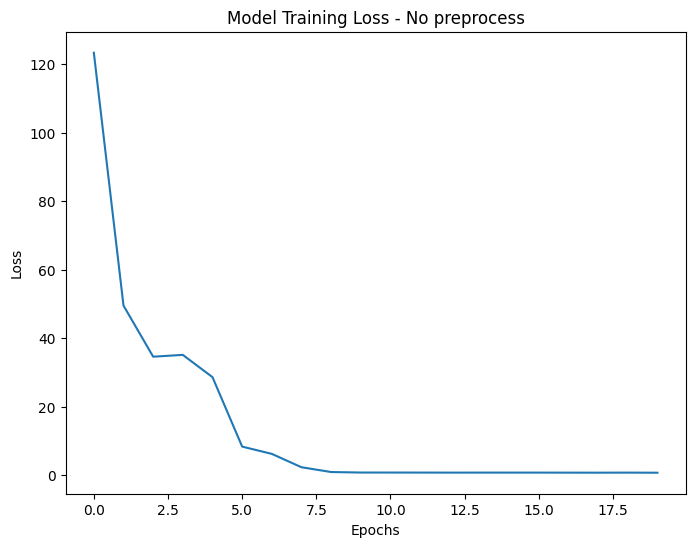

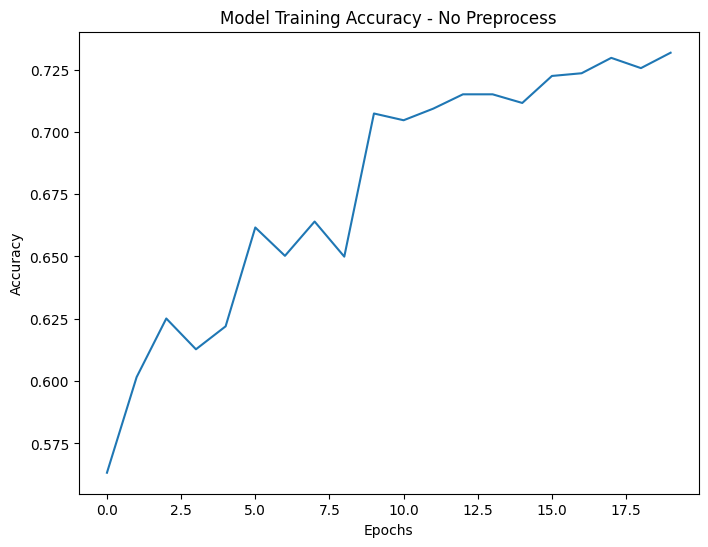

In [11]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(History.history['loss'])
plt.title('Model Training Loss - No preprocess')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.figure(figsize=(8, 6))
plt.plot(History.history['accuracy'])
plt.title('Model Training Accuracy - No Preprocess')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integers
y_test_classes = np.argmax(y_test, axis=1)

33/33 [==============================] - 0s 1ms/step


In [13]:
# Calculate evaluation metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1score = f1_score(y_test_classes, y_pred_classes, average='weighted')
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Print the evaluation metrics and confusion matrix
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")
print("Confusion Matrix:")
print(confusion)


Precision: 0.7019
Recall: 0.7203
F1-Score: 0.7063
Confusion Matrix:
[[ 34  11  53   0]
 [  7 513  69   1]
 [ 12 117 192   0]
 [  1   3  13   0]]


In [14]:
# Get the diagonal elements (true positive predictions)
TP_0 = confusion[0][0]
TP_1 = confusion[1][1]
TP_2 = confusion[2][2]
TP_3 = confusion[3][3]

# Calculate the total number of instances for each class
total_0 = sum(confusion[0])
total_1 = sum(confusion[1])
total_2 = sum(confusion[2])
total_3 = sum(confusion[3])

# Calculate the accuracy for each class
accuracy_0 = TP_0 / total_0
accuracy_1 = TP_1 / total_1
accuracy_2 = TP_2 / total_2
accuracy_3 = TP_3 / total_3

# Print the accuracy for each class
print(f"Accuracy for class 0: {accuracy_0:.4f}")
print(f"Accuracy for class 1: {accuracy_1:.4f}")
print(f"Accuracy for class 2: {accuracy_2:.4f}")
print(f"Accuracy for class 3: {accuracy_3:.4f}")

Accuracy for class 0: 0.3469
Accuracy for class 1: 0.8695
Accuracy for class 2: 0.5981
Accuracy for class 3: 0.0000


**Train On normalized Dataset**

In [15]:
# Normalize the feature data using standard normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [16]:
# Create a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(169,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
History = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
289/289 [==============================] - 2s 2ms/step - loss: 0.5789 - accuracy: 0.7672
Epoch 2/20
289/289 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.8231
Epoch 3/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8477
Epoch 4/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8657
Epoch 5/20
289/289 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.8799
Epoch 6/20
289/289 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.8916
Epoch 7/20
289/289 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9061
Epoch 8/20
289/289 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9193
Epoch 9/20
289/289 [==============================] - 1s 3ms/step - loss: 0.1834 - accuracy: 0.9298
Epoch 10/20
289/289 [==============================] - 1s 2ms/step - loss: 0.1577 - accuracy: 0.9422

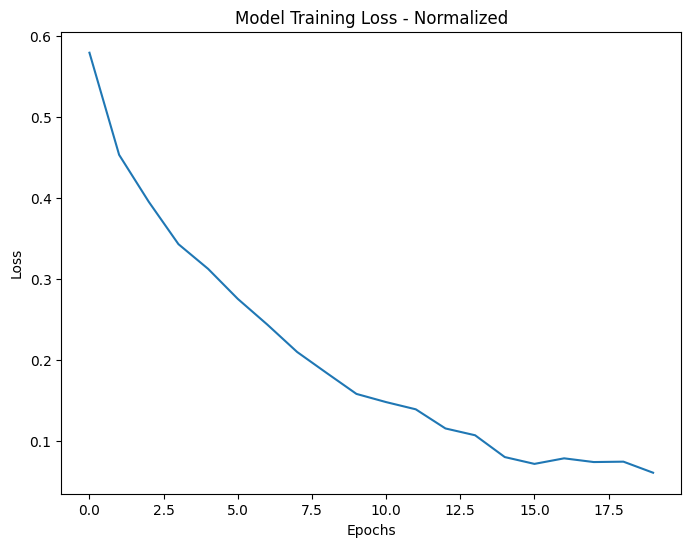

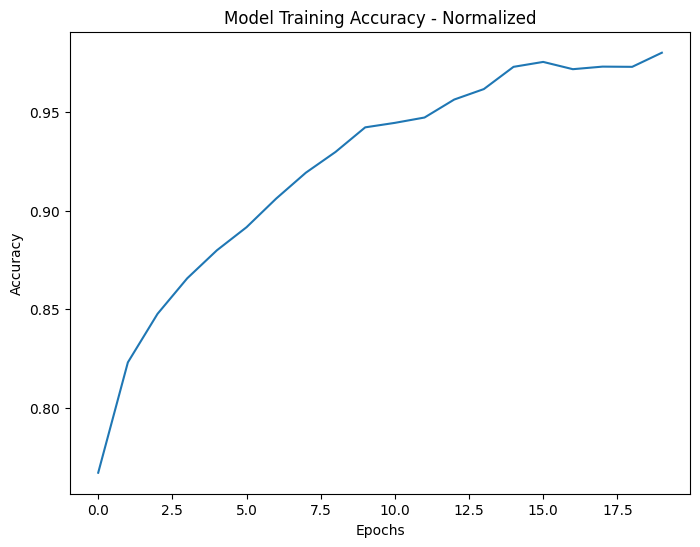

In [18]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(History.history['loss'])
plt.title('Model Training Loss - Normalized')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.figure(figsize=(8, 6))
plt.plot(History.history['accuracy'])
plt.title('Model Training Accuracy - Normalized')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integers
y_test_classes = np.argmax(y_test, axis=1)

33/33 [==============================] - 0s 1ms/step


In [20]:
# Calculate evaluation metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1score = f1_score(y_test_classes, y_pred_classes, average='weighted')
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Print the evaluation metrics and confusion matrix
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")
print("Confusion Matrix:")
print(confusion)

Precision: 0.8454
Recall: 0.8333
F1-Score: 0.8368
Confusion Matrix:
[[ 79   3  13   3]
 [  4 497  81   8]
 [  2  41 273   5]
 [  0   6   5   6]]


In [21]:
# Get the diagonal elements (true positive predictions)
TP_0 = confusion[0][0]
TP_1 = confusion[1][1]
TP_2 = confusion[2][2]
TP_3 = confusion[3][3]

# Calculate the total number of instances for each class
total_0 = sum(confusion[0])
total_1 = sum(confusion[1])
total_2 = sum(confusion[2])
total_3 = sum(confusion[3])

# Calculate the accuracy for each class
accuracy_0 = TP_0 / total_0
accuracy_1 = TP_1 / total_1
accuracy_2 = TP_2 / total_2
accuracy_3 = TP_3 / total_3

# Print the accuracy for each class
print(f"Accuracy for class 0: {accuracy_0:.4f}")
print(f"Accuracy for class 1: {accuracy_1:.4f}")
print(f"Accuracy for class 2: {accuracy_2:.4f}")
print(f"Accuracy for class 3: {accuracy_3:.4f}")

Accuracy for class 0: 0.8061
Accuracy for class 1: 0.8424
Accuracy for class 2: 0.8505
Accuracy for class 3: 0.3529


**2 Class - Normal ab Normal**

In [ ]:
df = pd.read_csv('ECG.csv')

df_filtered = df[df['label'].isin(['N', 'O', 'A'])]

# Map class labels to integers
label_mapping = {'N': 0, 'O': 1, 'A': 1}
df_filtered['label'] = df_filtered['label'].map(label_mapping)


df_filtered = df_filtered.iloc[:, 1:]

df_filtered.head()

<ipython-input-21-c2e36c42c992>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['label'] = df_filtered['label'].map(label_mapping)


,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat160,feat161,feat162,feat163,feat164,feat165,feat166,feat167,feat168,feat169
0,1,5,661.190476,658.333333,55.278736,106.962730,111.113889,13,0.928571,0.041,...,0.165551,0.196,0.321645,0.074160,0.000000,0.000000,0.000000,0.019540,0.340,0.000
1,1,5,661.666667,658.333333,56.579873,108.407273,112.510209,13,0.928571,0.150,...,0.190431,0.196,0.362420,0.085271,0.000000,0.000000,0.000000,0.022238,0.332,0.000
2,1,8,661.904762,660.000000,58.758004,112.796617,117.091412,13,0.928571,0.041,...,0.094497,0.316,0.376645,0.042448,0.000000,0.000000,0.000000,0.023166,0.452,0.000
3,1,7,660.952381,663.333333,59.029597,113.649634,117.981601,13,0.928571,0.041,...,0.157149,0.284,0.419043,0.070674,0.026236,0.015264,0.594278,0.025686,0.256,0.128
4,1,5,660.476191,663.333333,55.759820,107.623910,111.732026,13,0.928571,0.041,...,0.162662,0.204,0.354123,0.072988,0.025833,0.014326,0.657085,0.021802,0.328,0.128


In [ ]:

X = df_filtered.iloc[:, 1:]  # Extract all columns except the 'label'
y = df_filtered['label']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
# Create a sequential model for binary classification
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(169,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
History = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
284/284 [==============================] - 6s 4ms/step - loss: 0.4109 - accuracy: 0.8218
Epoch 2/20
284/284 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8616
Epoch 3/20
284/284 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8838
Epoch 4/20
284/284 [==============================] - 1s 2ms/step - loss: 0.2608 - accuracy: 0.8960
Epoch 5/20
284/284 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9080
Epoch 6/20
284/284 [==============================] - 1s 2ms/step - loss: 0.1953 - accuracy: 0.9246
Epoch 7/20
284/284 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9291
Epoch 8/20
284/284 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9428
Epoch 9/20
284/284 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.9470
Epoch 10/20
284/284 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9551

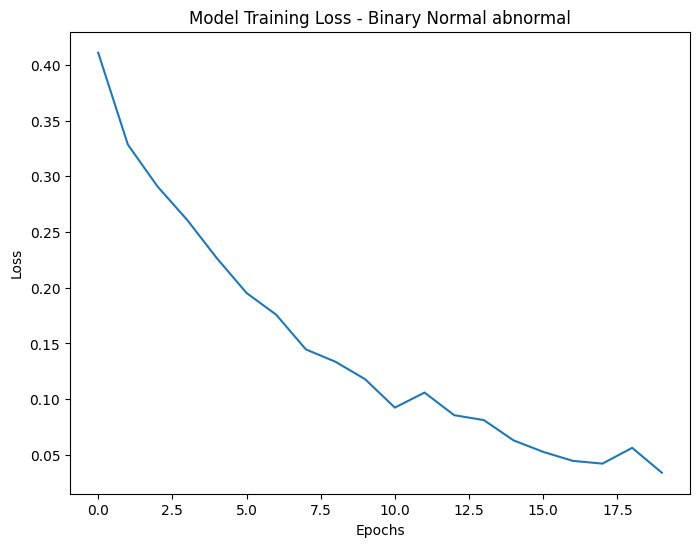

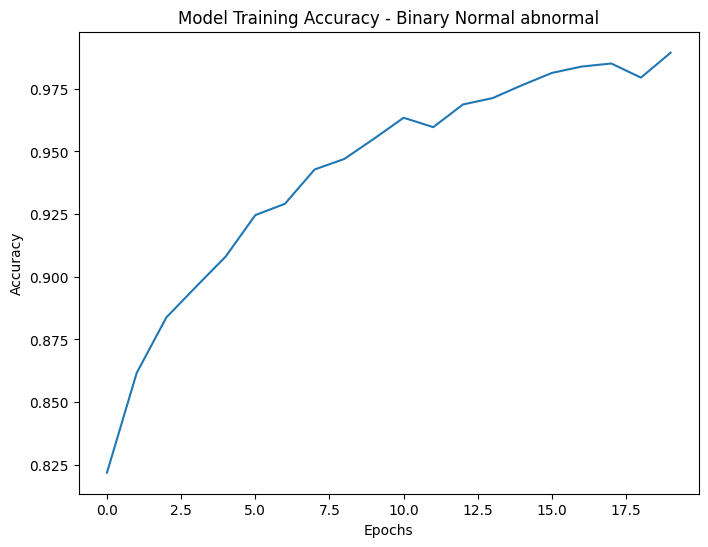

In [ ]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(History.history['loss'])
plt.title('Model Training Loss - Binary Normal abnormal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.figure(figsize=(8, 6))
plt.plot(History.history['accuracy'])
plt.title('Model Training Accuracy - Binary Normal abnormal')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_test_classes = np.argmax(y_test, axis=1)

32/32 [==============================] - 0s 1ms/step


In [ ]:
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1score = f1_score(y_test_classes, y_pred_classes)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")
print("Confusion Matrix:")
print(confusion)

Precision: 0.9292
Recall: 0.8221
F1-Score: 0.8723
Confusion Matrix:
[[583  25]
 [ 71 328]]
